In [1]:
#import pandas as pd
import pandas as pd

#importing numpy as np
import numpy as np

#import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

#import seaborn as sns
import seaborn as sns

In [2]:
#Import data
weather = pd.read_csv(r'C:\Users\tusha\OneDrive\Desktop\FINS3635 NEOBANK Project\Data\Weather (2).csv', encoding = 'latin1', delimiter = ',')  # Weather file

    # Client Cash Accounts

filename = r'C:\Users\tusha\OneDrive\Desktop\FINS3635 NEOBANK Project\Data\Client_Cash_Accounts (2).xlsx'

cash_account = pd.ExcelFile(filename)


    ## Corn Price History

filename_1 = r'C:\Users\tusha\OneDrive\Desktop\FINS3635 NEOBANK Project\Data\CORN_PriceHistory (4).xlsx'

corn_price_history = pd.ExcelFile(filename_1)

    ### Wheat Price History

filename_2 = r'C:\Users\tusha\OneDrive\Desktop\FINS3635 NEOBANK Project\Data\WHEAT_PriceHistory (2).xlsx'

wheat_price_history = pd.ExcelFile(filename_2)

# Converting excel files to Dataframes

cash_account_dict = pd.read_excel(cash_account, na_values = 'Missing', sheet_name = None) # Dictionary of DataFrames

corn_price_history_df = pd.read_excel(corn_price_history, na_values = 'Missing', sheet_name = 'Price History') 

wheat_price_history_df = pd.read_excel(wheat_price_history, na_values = 'Missing', sheet_name = 'Price History') 


In [3]:
import requests
r = requests.get('https://static.edusercontent.com/files/BUepgY4mvJhNPcAZ45STXyot')
json_news = r.json()
print(json_news)

{'Date': {'0': 'Friday, July 31, 2020 07:00:03 PM (GMT)', '1': 'Friday, July 31, 2020 07:00:03 PM (GMT)', '2': 'Friday, July 31, 2020 07:00:03 PM (GMT)', '3': 'Wednesday, July 29, 2020 07:00:14 PM (GMT)', '4': 'Wednesday, July 29, 2020 07:00:14 PM (GMT)', '5': 'Wednesday, July 29, 2020 07:00:14 PM (GMT)', '6': 'Tuesday, July 28, 2020 07:00:42 PM (GMT)', '7': 'Tuesday, July 28, 2020 07:00:42 PM (GMT)', '8': 'Tuesday, July 28, 2020 07:00:42 PM (GMT)', '9': 'Monday, July 27, 2020 07:00:55 PM (GMT)', '10': 'Monday, July 27, 2020 07:00:55 PM (GMT)', '11': 'Monday, July 27, 2020 07:00:55 PM (GMT)', '12': 'Friday, July 24, 2020 07:00:22 PM (GMT)', '13': 'Friday, July 24, 2020 07:00:22 PM (GMT)', '14': 'Friday, July 24, 2020 07:00:22 PM (GMT)', '15': 'Thursday, July 23, 2020 07:00:40 PM (GMT)', '16': 'Thursday, July 23, 2020 07:00:40 PM (GMT)', '17': 'Wednesday, July 22, 2020 07:00:27 PM (GMT)', '18': 'Wednesday, July 22, 2020 07:00:27 PM (GMT)', '19': 'Wednesday, July 22, 2020 07:00:27 PM (GM

In [4]:
news = pd.DataFrame(columns = ['Date', 'Source', 'Headline'], data = json_news)

In [5]:
%store news

Stored 'news' (DataFrame)


In [6]:
# Cleansing and transforming weather to prepare for Station 2

    #Checking missing values
print(weather.isnull().sum())

    # Using interpolate() to fill in missing values in DataFrame using linear method

weather = weather.interpolate(method = 'linear', limit_direction = 'forward') # Direction of maximum wind gust has null value


Date                                  0
Minimum temperature (°C)              9
Maximum temperature (°C)             13
Rainfall (mm)                         0
Direction of maximum wind gust        1
Speed of maximum wind gust (km/h)     1
Time of maximum wind gust             1
9am Temperature (°C)                  3
9am relative humidity (%)             3
9am wind direction                    0
9am wind speed (km/h)                 0
3pm Temperature (°C)                  4
3pm relative humidity (%)             4
3pm wind direction                    0
3pm wind speed (km/h)                 0
dtype: int64


In [7]:
 # Convert 'Date' to a Date-time dtype
import datetime as dt
weather['Date'] = pd.to_datetime(weather['Date']).dt.date

    #Check for duplicates

weather_duplicates = weather.duplicated(subset = ['Date'], keep = False)

        #Sorting
duplicated_weather_entries = weather[weather_duplicates].sort_values('Date')

        #Print relevant columns
print(duplicated_weather_entries['Date']) ## no duplicate entries found

    #Replace white space from '9am wind direction' with 'nan' then drop null values                   
weather['9am wind direction'] = weather['9am wind direction'].replace('',np.nan, regex = True)
weather = weather.dropna(axis = 0)

Series([], Name: Date, dtype: object)


C:\Users\tusha\AppData\Local\Temp\ipykernel_22920\3608124081.py:3: UserWarning: Parsing '13/10/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  weather['Date'] = pd.to_datetime(weather['Date']).dt.date
C:\Users\tusha\AppData\Local\Temp\ipykernel_22920\3608124081.py:3: UserWarning: Parsing '14/10/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  weather['Date'] = pd.to_datetime(weather['Date']).dt.date
C:\Users\tusha\AppData\Local\Temp\ipykernel_22920\3608124081.py:3: UserWarning: Parsing '15/10/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  weather['Date'] = pd.to_datetime(weather['Date']).dt.date
C:\Users\tusha\AppData\Local\Temp\ipykernel_22920\3608124081.py:3: UserWarning: Parsing '16/10/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  weather['Date'] = 

In [8]:
# Adding Avg Temp column
weather['Avg Temp'] = weather[['Minimum temperature (°C)', 'Maximum temperature (°C)']].mean(axis = 1)
print(weather.head())


         Date  Minimum temperature (°C)  Maximum temperature (°C)  \
0  2019-01-07                       2.5                      18.1   
1  2019-02-07                       3.2                      22.4   
2  2019-03-07                       6.3                      17.4   
3  2019-04-07                      11.7                      15.8   
4  2019-05-07                      11.6                      18.1   

   Rainfall (mm) Direction of maximum wind gust   \
0            0.0                               W   
1            0.0                             NNW   
2            0.0                               S   
3            1.8                              SE   
4            1.2                             ESE   

   Speed of maximum wind gust (km/h) Time of maximum wind gust  \
0                               15.0                      0:33   
1                               31.0                     14:16   
2                               24.0                     13:52   
3       

In [9]:
# Store variable weather
%store weather

Stored 'weather' (DataFrame)


In [10]:
# Cleansing Corn Price DataFrame to prepare for Station 2
    # Removing rows 0-13 & columns 12-14  as they are irrelevant to dataset
corn_price_history_df.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], axis = 0, inplace = True)
corn_price_history_df.head() # Rows dropped

corn_price_history_df.drop(['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'], axis = 1, inplace = True)
corn_price_history_df.head() # Columns dropped

    #Reset index
corn_price_history_df = corn_price_history_df.reset_index(drop = True)

    #Replace column names with header

new_header = corn_price_history_df.iloc[0]
corn_price_history_df = corn_price_history_df[1:]
corn_price_history_df.columns = new_header

corn_price_history_df = corn_price_history_df.fillna(0) #Fillned null value with as this was the first data entry required

<AxesSubplot:>

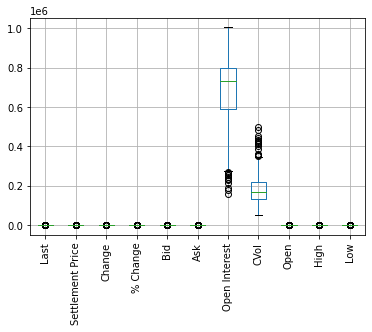

In [11]:
corn_price_history_df.boxplot(rot = 90)

In [12]:
# Store corn_price_history dataframe
%store corn_price_history_df

Stored 'corn_price_history_df' (DataFrame)


In [13]:
# Cleansig Wheat Prices DataFrame to prepare for Station 2

    # Removing rows 0-13 and colums 12-14  as they are irrelevant to dataset
wheat_price_history_df.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], axis = 0, inplace = True)
wheat_price_history_df.drop(['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'], axis = 1, inplace = True)
wheat_price_history_df.head()

,Price History: W00-USA,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
14,Date,Last,Settlement Price,Change,% Change,Bid,Ask,Open Interest,CVol,Open,High,Low
15,2020-07-31 00:00:00,5.3075,5.3125,0.0175,0.3305,5.305,5.305,185655,44131,5.285,5.3525,5.285
16,2020-07-30 00:00:00,5.2875,5.295,-0.0325,-0.610042,5.285,5.29,186779,44413,5.3175,5.345,5.25
17,2020-07-29 00:00:00,5.33,5.3275,0.0925,1.766953,5.3275,5.33,185642,40067,5.235,5.3325,5.235
18,2020-07-28 00:00:00,5.235,5.235,-0.0425,-0.805306,5.235,5.2375,186475,48774,5.265,5.2975,5.1925


In [14]:
# Reset Index 
wheat_price_history_df = wheat_price_history_df.reset_index(drop = True)

# Replace column names with header

new_header_wheat = wheat_price_history_df.iloc[0]
wheat_price_history_df = wheat_price_history_df[1:]
wheat_price_history_df.columns = new_header_wheat

wheat_price_history_df.head()

,Date,Last,Settlement Price,Change,% Change,Bid,Ask,Open Interest,CVol,Open,High,Low
1,2020-07-31 00:00:00,5.3075,5.3125,0.0175,0.3305,5.305,5.305,185655,44131,5.285,5.3525,5.285
2,2020-07-30 00:00:00,5.2875,5.295,-0.0325,-0.610042,5.285,5.29,186779,44413,5.3175,5.345,5.25
3,2020-07-29 00:00:00,5.33,5.3275,0.0925,1.766953,5.3275,5.33,185642,40067,5.235,5.3325,5.235
4,2020-07-28 00:00:00,5.235,5.235,-0.0425,-0.805306,5.235,5.2375,186475,48774,5.265,5.2975,5.1925
5,2020-07-27 00:00:00,5.265,5.2775,-0.1175,-2.177943,5.265,5.2675,186372,45729,5.3875,5.39,5.2625


In [15]:
# Checking null values in dataset
print(wheat_price_history_df.isnull().sum())

0
Date                0
Last                0
Settlement Price    0
Change              1
% Change            1
Bid                 0
Ask                 0
Open Interest       0
CVol                0
Open                0
High                0
Low                 0
dtype: int64


In [16]:
# Null values on first data entry so replace with 0
wheat_price_history_df = wheat_price_history_df.fillna(0)


<AxesSubplot:>

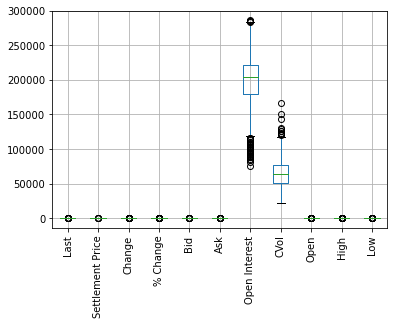

In [17]:
#Visualize outliers
wheat_price_history_df.boxplot(rot = 90)

In [18]:
%store wheat_price_history_df

Stored 'wheat_price_history_df' (DataFrame)


In [19]:
# Cash Accounts for clients
    # Importing dataframes for client 1

c1 = pd.read_excel(cash_account, na_values = 'Missing', sheet_name = '1')
c1x = pd.read_excel(cash_account, na_values = 'Missing', sheet_name = '1x')

print()
    #DataFrames for client 2
c2 = pd.read_excel(cash_account, na_values = 'Missing', sheet_name = '2')
c2x = pd.read_excel(cash_account, na_values = 'Missing', sheet_name = '2x')

    #Client 3
c3 = pd.read_excel(cash_account, na_values = 'Missing', sheet_name = '3')
c3x = pd.read_excel(cash_account, na_values = 'Missing', sheet_name = '3x')
    
    #Client4
c4 = pd.read_excel(cash_account, na_values = 'Missing', sheet_name = '4')
c4x = pd.read_excel(cash_account, na_values = 'Missing', sheet_name = '4x')

    #Client 5
c5 = pd.read_excel(cash_account, na_values = 'Missing', sheet_name = '5')
c5x = pd.read_excel(cash_account, na_values = 'Missing', sheet_name ="5x")


In [20]:
new_header_c4x = c4x.iloc[0]
c4x = c4x[1:]
c4x.columns = new_header_c4x

print(c4x.head())

0                 Date Daily Flows Cash Balance
1  2019-06-25 00:00:00     1257.19      1257.19
2  2019-06-27 00:00:00     -801.46       455.73
3  2019-06-30 00:00:00        4000      4455.73
4  2019-07-01 00:00:00      684.42      5140.15
5  2019-07-03 00:00:00     -160.27      4979.88


In [21]:
print(c1.isnull().sum())
print(c1x.isnull().sum())




Client                 0
Transaction Date       0
Type                   0
Customer / Supplier    0
Reference              0
Description            0
Flow                   0
Balance                0
dtype: int64
Client          0
Date            0
Daily Flows     0
Cash Balance    0
dtype: int64


In [22]:
# Storing client cash accounts
%store c1
%store c1x
%store c2
%store c2x
%store c3
%store c3x
%store c4
%store c4x
%store c5
%store c5x


Stored 'c1' (DataFrame)
Stored 'c1x' (DataFrame)
Stored 'c2' (DataFrame)
Stored 'c2x' (DataFrame)
Stored 'c3' (DataFrame)
Stored 'c3x' (DataFrame)
Stored 'c4' (DataFrame)
Stored 'c4x' (DataFrame)
Stored 'c5' (DataFrame)
Stored 'c5x' (DataFrame)


In [23]:
#

print(wheat_price_history_df.describe())
print(corn_price_history_df.describe())
print(weather.describe())


0            Last  Settlement Price      Change    % Change         Bid  \
count  504.000000        504.000000  504.000000  504.000000  504.000000   
mean     5.110615          5.111176   -0.000536    0.002256    5.108616   
std      0.320170          0.319091    0.079402    1.559667    0.320132   
min      4.245000          4.247500   -0.277500   -5.555556    4.242500   
25%      4.921875          4.919375   -0.055000   -1.060550    4.919375   
50%      5.137500          5.138750   -0.002500   -0.049044    5.136250   
75%      5.292500          5.300625    0.043125    0.856455    5.291875   
max      5.825000          5.815000    0.267500    5.717620    5.822500   

0             Ask  Open Interest           CVol        Open        High  \
count  504.000000     504.000000     504.000000  504.000000  504.000000   
mean     5.112371  197313.069444   65664.382937    5.114112    5.173805   
std      0.320329   40014.197688   20623.438573    0.320737    0.324001   
min      4.245000   7581

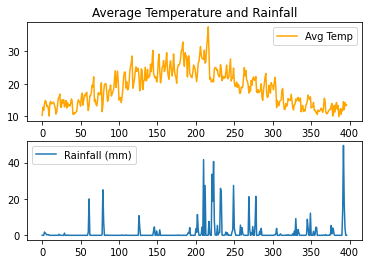

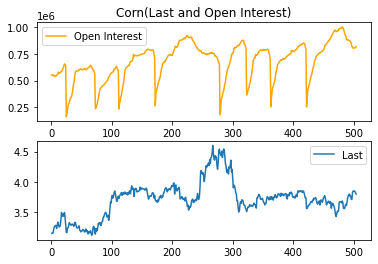

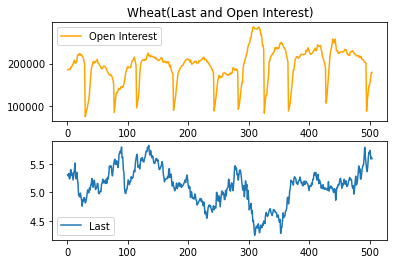

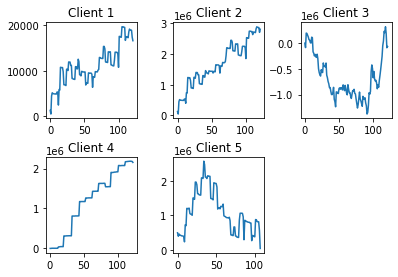

In [34]:
#Plots
plt.subplot(2,1,1)
weather['Avg Temp'].plot(color = 'orange')
plt.legend()
plt.title('Average Temperature and Rainfall')
plt.subplot(2,1,2)
weather['Rainfall (mm)'].plot()
plt.legend()
plt.show()

#Corn
plt.subplot(2,1,1)
corn_price_history_df['Open Interest'].plot(color = 'orange')
plt.legend()
plt.title('Corn(Last and Open Interest)')
plt.subplot(2,1,2)
corn_price_history_df['Last'].plot()
plt.legend()
plt.show()

#Wheat
plt.subplot(2,1,1)
wheat_price_history_df['Open Interest'].plot(color = 'orange')
plt.legend()
plt.title('Wheat(Last and Open Interest)')
plt.subplot(2,1,2)
wheat_price_history_df['Last'].plot()
plt.legend()
plt.show()

#Clients
plt.subplot(2,3,1)
c1x['Cash Balance'].plot()
plt.title('Client 1')
plt.subplot(2,3,2)
c2x['Cash Balance'].plot()
plt.title("Client 2")
plt.subplot(2,3,3)
c3x['Cash Balance'].plot()
plt.title('Client 3')
plt.subplot(2,3,4)
c4x['Cash Balance'].plot()
plt.title("Client 4")
plt.subplot(2,3,5)
c5x['Cash Balance'].plot()
plt.title('Client 5')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

